In [1]:
import dynamiqs as dq
import jax.numpy as jnp
from jaxpulse.controllers import *
from jaxpulse.optimizers import *
from gkp_utils.utils import *
import matplotlib.pyplot as plt

In [2]:
logical_one_projector = dq.tensor(dq.todm(logical_one),dq.eye(2))
y_final_direct = lambda y: 1. - dq.expect(logical_one_projector,y)
direct_controls = ControlVector(
    [
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2.0])
        ),
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2.0])
        ),GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2.0])
        ),
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2.0])
        ),
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2.0])
        )
    ]
)
gkp_sys = OpenQuantumSystem(
    H_0=II,
    H_M=[IZ, IX, XZ, PZ],
    U_K=[],
    C_K=[Ia]
)

In [3]:
rho0=dq.tensor(dq.fock_dm(GKP_N,0),dq.fock_dm(2,0))
t1=10.
gkp_direct = OptimalController(
    system=gkp_sys,
    controls=direct_controls,
    y0=rho0,
    y_final=y_final_direct,
    duration=t1
)

### Pre-Opt 

/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
/tmp/ipykernel_18056/1693964137.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


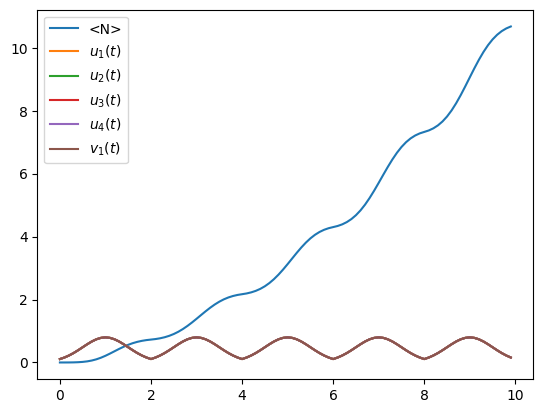

In [4]:
# preopt
fig,ax = plt.subplots()
gkp_direct.plot(ax=ax,exp_ops=[NI],exp_names=["<N>"])
ax.legend()
fig.show()

In [5]:
rhot = gkp_direct.run()
rho_r_t = dq.ptrace(rhot, 0, (GKP_N,2))


/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.


100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


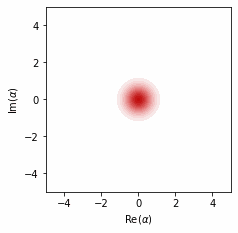

In [6]:
dq.plot.wigner_gif(rho_r_t)

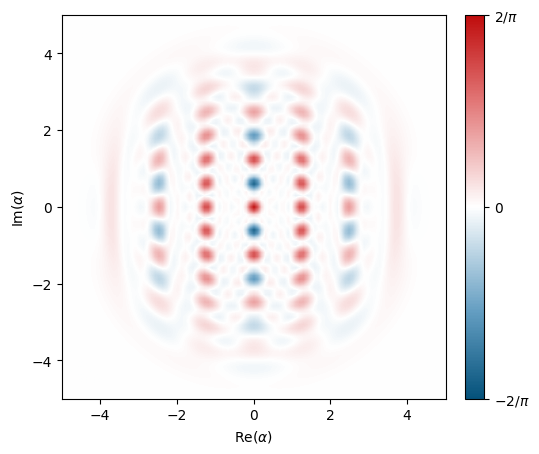

In [7]:
dq.plot.wigner(logical_one)

In [8]:
gkp_opt = gkp_direct.optimize(N_steps=500,learning_rate=.0025,verbosity=1)

/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.


Step: 0 Loss: 0.9673586487770081
Step: 1 Loss: 0.9651124477386475
Step: 2 Loss: 0.9636951684951782
Step: 3 Loss: 0.9626316428184509
Step: 4 Loss: 0.9617948532104492
Step: 5 Loss: 0.9610947370529175
Step: 6 Loss: 0.9604588747024536
Step: 7 Loss: 0.9598417282104492
Step: 8 Loss: 0.9592219591140747
Step: 9 Loss: 0.9585943222045898
Step: 10 Loss: 0.9579646587371826
Step: 11 Loss: 0.9573372006416321
Step: 12 Loss: 0.9567217826843262
Step: 13 Loss: 0.956127405166626
Step: 14 Loss: 0.9555572271347046
Step: 15 Loss: 0.955017626285553
Step: 16 Loss: 0.9545077681541443
Step: 17 Loss: 0.9540292024612427
Step: 18 Loss: 0.9535775780677795
Step: 19 Loss: 0.9531438946723938
Step: 20 Loss: 0.9527236819267273
Step: 21 Loss: 0.9523136019706726
Step: 22 Loss: 0.9519104957580566
Step: 23 Loss: 0.9515204429626465
Step: 24 Loss: 0.9511423707008362
Step: 25 Loss: 0.9507714509963989
Step: 26 Loss: 0.950415313243866
Step: 27 Loss: 0.9500758647918701
Step: 28 Loss: 0.9497489333152771
Step: 29 Loss: 0.9494373202

In [9]:
rho_t_opt = gkp_opt.run()
rho_r_t_opt = dq.ptrace(rho_t_opt, 0, (GKP_N, 2))

/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.


100%|██████████| 50/50 [00:04<00:00, 10.36it/s]


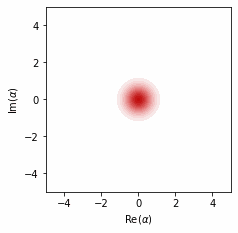

In [10]:
dq.plot.wigner_gif(rho_r_t_opt)

/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
/tmp/ipykernel_18056/3331804004.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


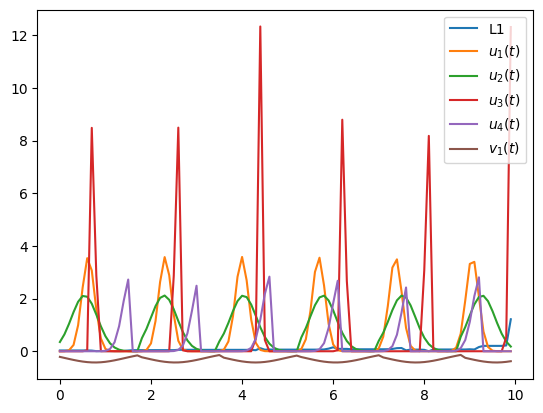

In [12]:
l1_projector = dq.tensor(dq.todm(logical_one), dq.eye(2))
fig,ax = plt.subplots()
gkp_opt.plot(ax=ax, exp_ops=[l1_projector],exp_names=["L1"])
gkp_opt.controls
ax.legend()
fig.show()